In [ ]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## Carga de datos.

In [ ]:
dat <- read.csv("datos_temprt.csv")

In [ ]:
head(dat)

,X,Depth,Temperature,Cast,Cruise,Latitude,Longitude,Day,Month,Year,Institute,Instrument,Device,Sospechoso,Ts
,<int>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<chr>,<int>,<dbl>
1,1,0,29.1,3678873,GB-0,19.85,-86.75,15,9,1981,NA,NA,XBT,NA,15.18482
2,2,5,29.1,3678873,GB-0,19.85,-86.75,15,9,1981,NA,NA,XBT,NA,15.18482
3,3,10,29.1,3678873,GB-0,19.85,-86.75,15,9,1981,NA,NA,XBT,NA,15.18482
4,4,15,29.1,3678873,GB-0,19.85,-86.75,15,9,1981,NA,NA,XBT,NA,15.18482
5,5,20,29.1,3678873,GB-0,19.85,-86.75,15,9,1981,NA,NA,XBT,NA,15.18482
6,6,25,28.9,3678873,GB-0,19.85,-86.75,15,9,1981,NA,NA,XBT,NA,15.18482


In [ ]:
# Se seleccionan unicamente las variables con las que se estara trabajando.
dat <- dat %>% 
    select(Depth, Latitude, Longitude, Month, Ts, Cast, Temperature)
head(dat)

,Depth,Latitude,Longitude,Month,Ts,Cast,Temperature
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>
1,0,19.85,-86.75,9,15.18482,3678873,29.1
2,5,19.85,-86.75,9,15.18482,3678873,29.1
3,10,19.85,-86.75,9,15.18482,3678873,29.1
4,15,19.85,-86.75,9,15.18482,3678873,29.1
5,20,19.85,-86.75,9,15.18482,3678873,29.1
6,25,19.85,-86.75,9,15.18482,3678873,28.9


In [ ]:
str(dat)

'data.frame':	108464 obs. of  7 variables:
 $ Depth      : num  0 5 10 15 20 25 30 35 40 45 ...
 $ Latitude   : num  19.9 19.9 19.9 19.9 19.9 ...
 $ Longitude  : num  -86.8 -86.8 -86.8 -86.8 -86.8 ...
 $ Month      : int  9 9 9 9 9 9 9 9 9 9 ...
 $ Ts         : num  15.2 15.2 15.2 15.2 15.2 ...
 $ Cast       : int  3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 3678873 ...
 $ Temperature: num  29.1 29.1 29.1 29.1 29.1 28.9 28.7 28.6 28.5 28.4 ...


## Análisis exploratorio.

### Variable predictora: Depth

In [ ]:
summary(dat$Depth)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.0   118.4   290.3   351.0   508.0  1990.8 

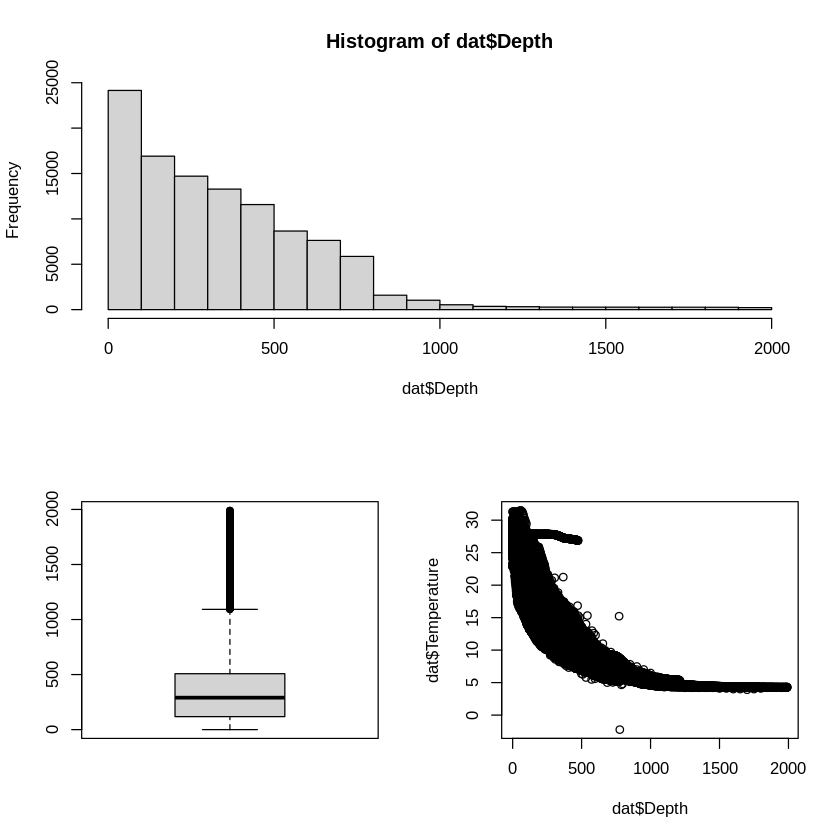

In [ ]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

hist(dat$Depth)
boxplot(dat$Depth)
plot(dat$Depth, dat$Temperature)

En el histograma de frencuencias se puede notar que la cantidad de observaciones va disminuyendo mientras más alta es la profundidad, lo cual es coherente debido a la posible dificultad de realizar las muestras a grandes profundidades.

El boxplot muestra que hay varios valores atípicos en el conjunto de observaciones, los cuáles representan muestras en produndidades altas.

Por otra parte la relación entre este predictor y la variable de respuesta tiene una forma particular, que no es lineal sino parece una relación logaritmica, lo cual sugiere que muy probablemente sea necesario transformar el conjunto de datos para encontrar un mejor modelo.

Como dato interesante la profundidad máxima en la cual se realizo alguna muestra fue de 1990.8 metros. Mientras que la produndidad media es de 351.0 metros.

### Variable predictora: Latitude

In [ ]:
summary(dat$Latitude)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  18.20   21.01   22.18   21.88   23.07   23.55 

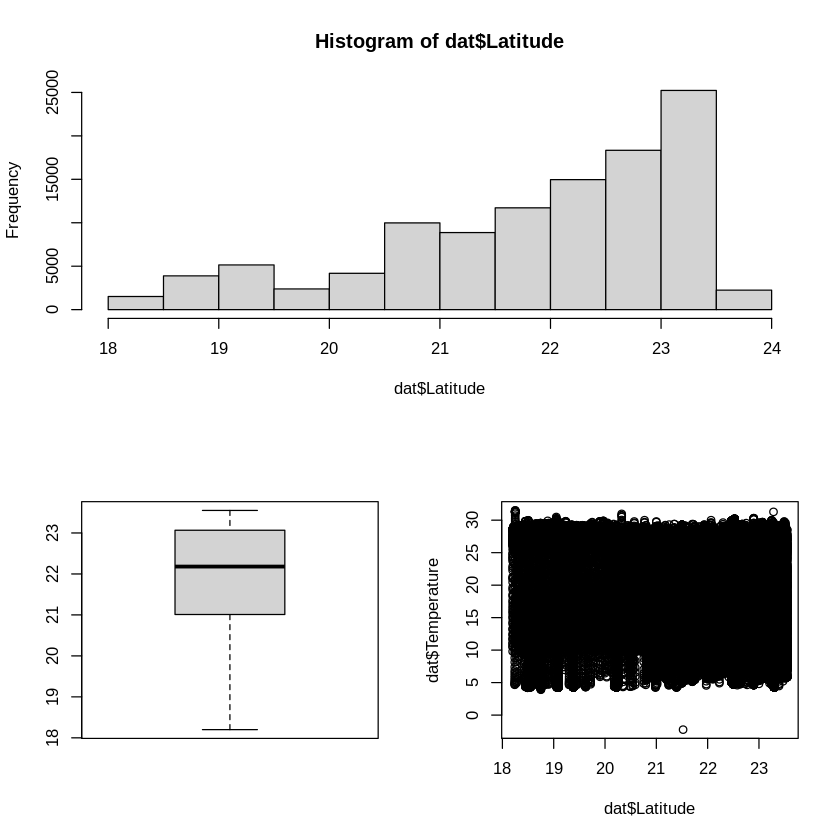

In [ ]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

hist(dat$Latitude)
boxplot(dat$Latitude)
plot(dat$Latitude, dat$Temperature)

Como ya se conoce, estos datos corresponden a temperaturas medidas en diferentes ubicaciones y profundidades del Caribe mexicano, de ahí que en el resumen se observe que la latitud tiene un rango pequeño.

En el histograma de frecuencias se aprecia que hay mas observaciones en latitudes altas. Este mismo comportamiento en el conjunto de datos se puede apreciar en el boxplot, el cuál además no tiene  valores atipicos, lo cuál no es extraño ya que las ubicaciones son solo del Caribe mexicano.

El diagrama de dispersión entre el predictor y la variable de respuesta no parece tener una relación muy clara.



### Variable predictora: Longitude

In [ ]:
summary(dat$Longitude)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 -87.55  -86.62  -86.35  -86.39  -86.11  -85.88 

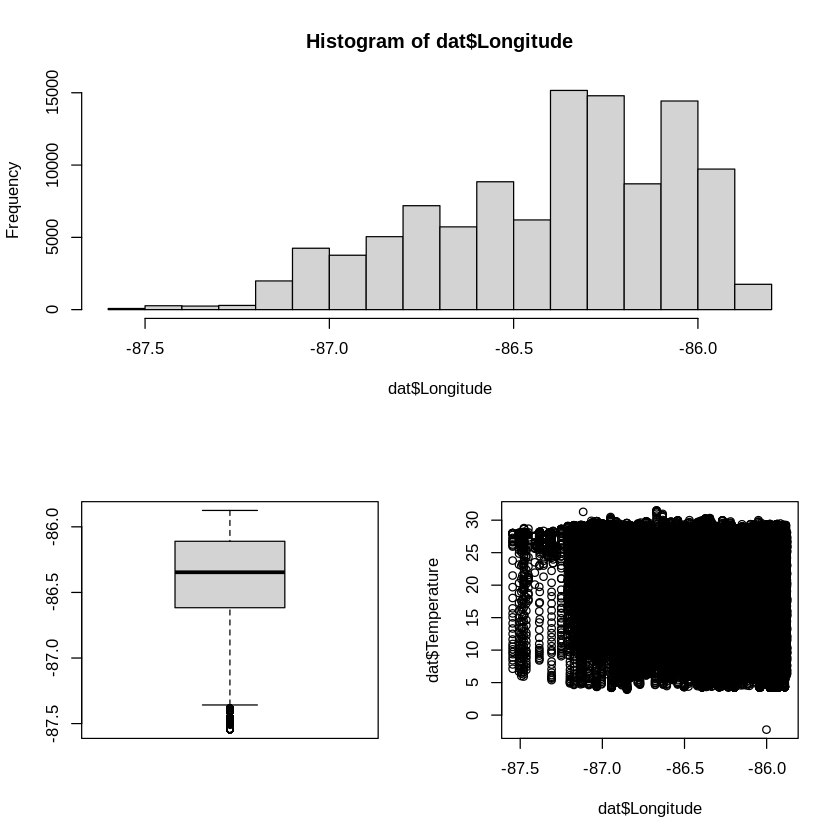

In [ ]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

hist(dat$Longitude)
boxplot(dat$Longitude)
plot(dat$Longitude, dat$Temperature)

Al igual que en la latidud, como las ubicaciones de las observaciones son de una misma región, el rango de valores es pequeño.

Tanto en el histograma de frecuencias como en el boxplot se aprecia un mayor conjunto de observaciones en longitudes altas, pero para esta variable si se presentan algunos valores atípicos en longitudes bajas.

Nuevamente al igual que en la latitud, el diagrama de dispersión entre este predictor y la variable de respuesta no parece tener una relación muy clara.

### Variable predictora: Month

In [ ]:
summary(dat$Month)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   5.000   7.000   7.362  11.000  12.000 

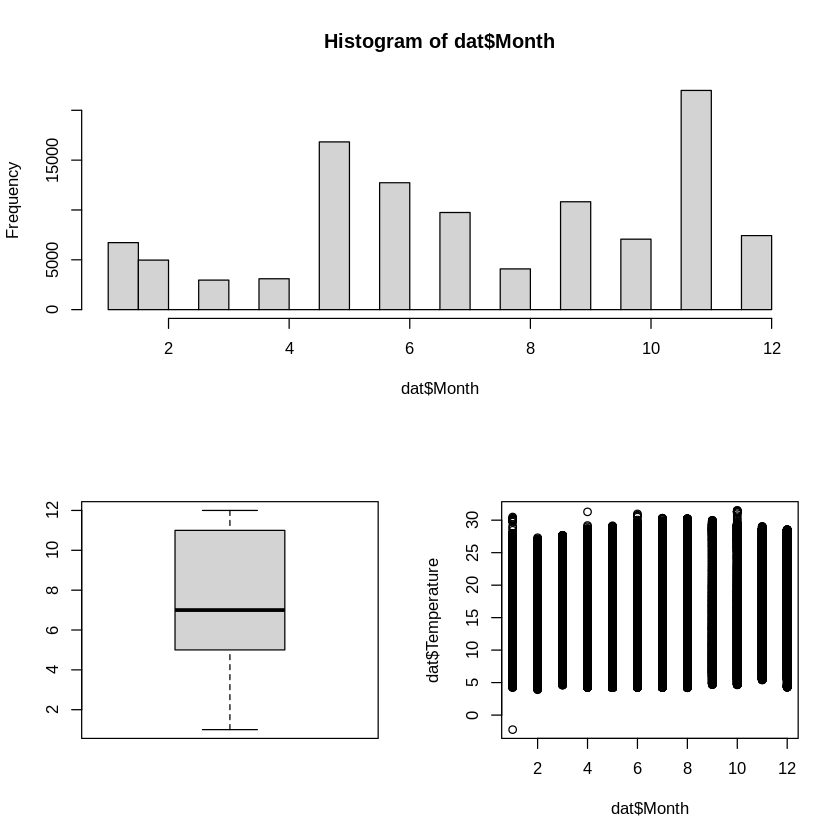

In [ ]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

hist(dat$Month)
boxplot(dat$Month)
plot(dat$Month, dat$Temperature)

Para el mes, podemos ver en el histograma de frecuencias  que se realizaron más observaciones en el mes de noviembre y luego le siguen los meses del centro.

En el boxplot se puede notar aun más la preferencia de realizar observaciones en la segunda mitad del año.

Y la relación entre el predictor y la variable de respuesta es muy ligera por no decir nula.

### Variable predictora: Ts

In [ ]:
summary(dat$Ts)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  9.176  19.063  20.375  21.389  23.615  30.162 

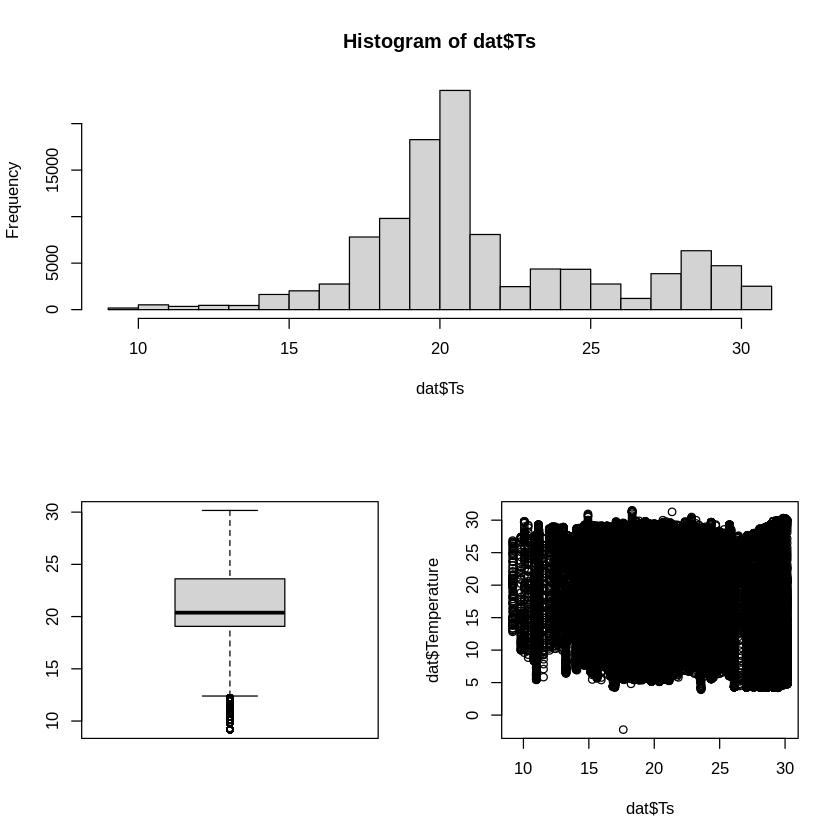

In [ ]:
layout(matrix(c(1,1,2,3), 2, 2, byrow = TRUE))

hist(dat$Ts)
boxplot(dat$Ts)
plot(dat$Ts, dat$Temperature)

La temperatura superficial muestra un rango de aproximadamente 20°C con una media de 21.38°C, la cual coincide con la mayor frecuencia de observaciones del histograma, en este histograma tambien se observa que las temperaturas tanto menores como mayores de la media van dismiuyendo en cantidad de observaciones.

En el boxplot se pueden apreciar algunos valores atípicos en temperaturas bajas, muy probablemente están relacionados a los valores atípicos que se encontraban en altas  profundidades.

Por otra parte la relación entre la variable predictora y la variable de respuesta igual es muy poca.

### Variable: Cast

A continuación se agrupan las observaciones en base a la variable Cast (la cual  indica una muestra tomada desde un crucero oceanográfico que se detiene en algún punto del océano y lanza una sonda que mide temperaturas a diferentes profundidades) y se cuenta la cantidad de observaciones que realizo cada crucero oceanográfico de manera ordenada. De esta forma se podrán elegir aquellas que tengan más observaciones para un mejor análisis.

In [ ]:
cast_order_by_obs <- dat %>%
    count(Cast, sort = T)
head(cast_order_by_obs)

,Cast,n
,<int>,<int>
1,3978849,1222
2,7332785,1222
3,4082229,1221
4,7317264,1221
5,3957918,1220
6,3957927,1220


Visualización de diagramas de dispersión para el subconjunto de observaciones que corresponden al Cast con más muestras tomadas.

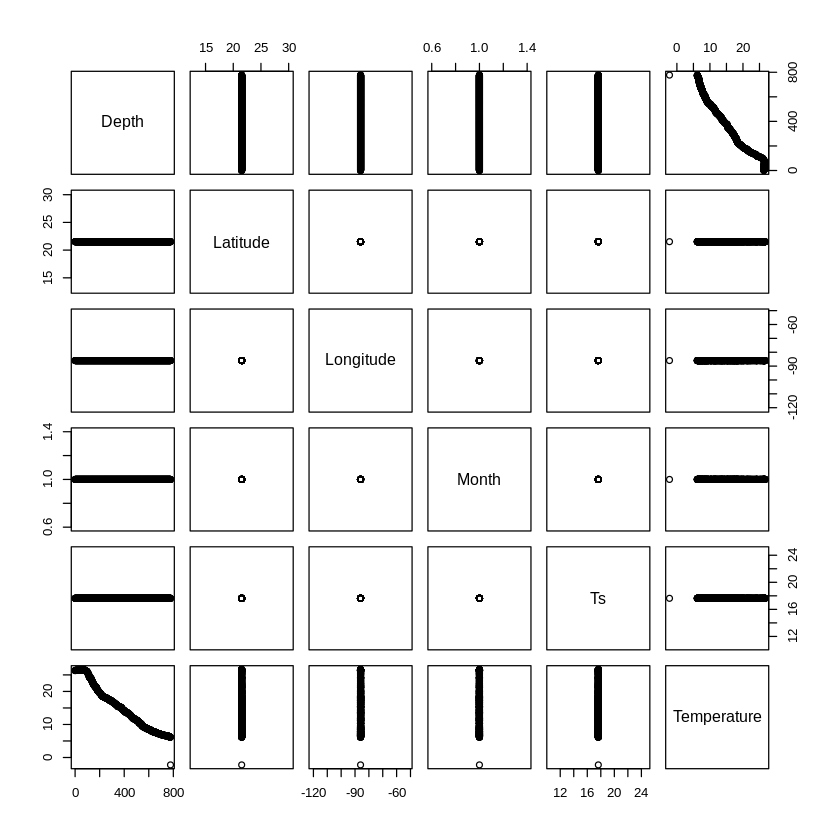

In [ ]:
dat_cast_1 <- dat %>%
    filter(Cast == 3978849) %>%
    select(-Cast)

pairs(dat_cast_1)

Visualización de diagramas de dispersión para el subconjunto de observaciones que corresponden al segundo Cast con más muestras tomadas.

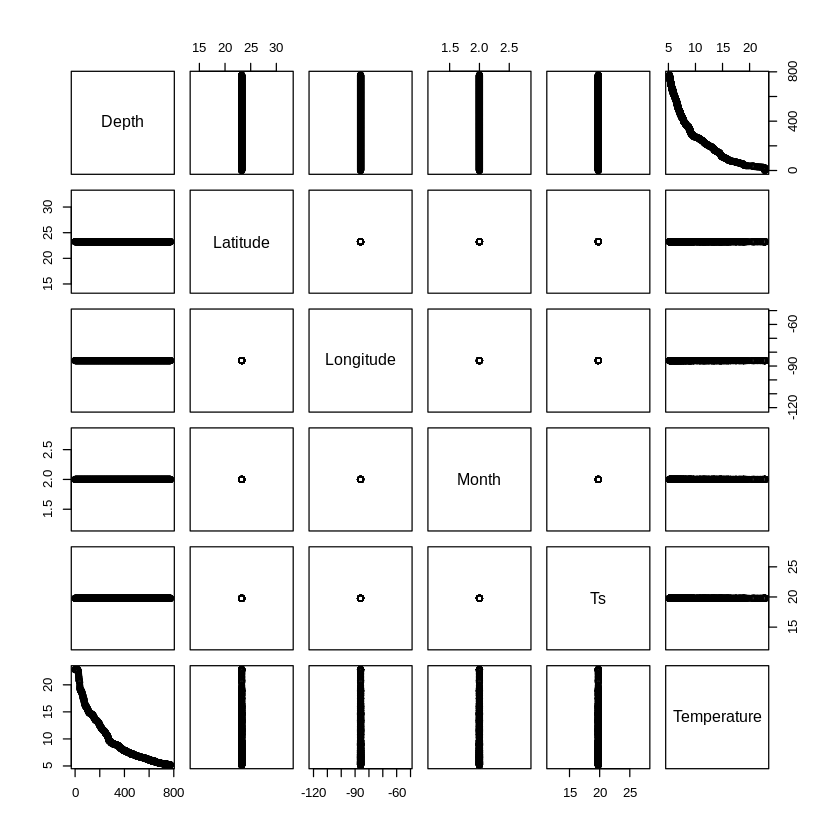

In [ ]:
dat_cast_2 <- dat %>%
    filter(Cast == 7332785) %>%
    select(-Cast)

pairs(dat_cast_2)

Visualización de diagramas de dispersión para el subconjunto de observaciones que corresponden al tercer Cast con más muestras tomadas.

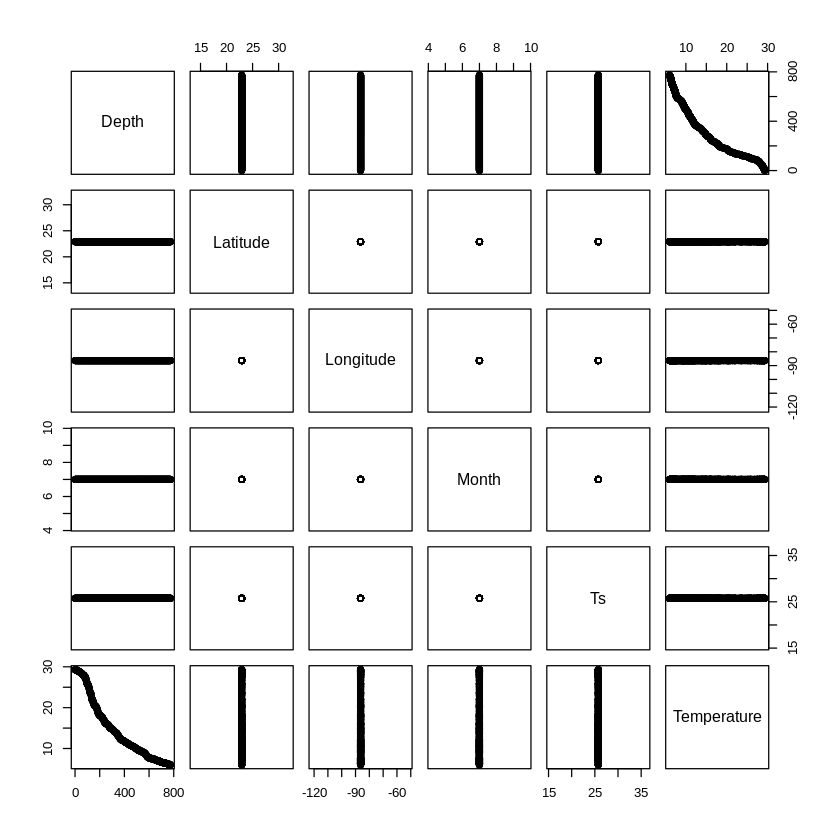

In [ ]:
dat_cast_3 <- dat %>%
    filter(Cast == 4082229) %>%
    select(-Cast)

pairs(dat_cast_3)

## Modelado.

Primer intento de modelo de regresión lineal múltiple utilizando los 5 predictores.

In [ ]:
r0 <- lm(Temperature ~ Depth + Latitude + Longitude + Month + Ts, data = dat)
summary(r0)


Call:
lm(formula = Temperature ~ Depth + Latitude + Longitude + Month + 
    Ts, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.8985 -2.7628 -0.7294  2.3352 24.0693 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.029e+02  3.141e+00   64.60   <2e-16 ***
Depth       -2.179e-02  4.184e-05 -520.86   <2e-16 ***
Latitude    -1.050e+00  8.401e-03 -125.02   <2e-16 ***
Longitude    1.836e+00  3.601e-02   51.00   <2e-16 ***
Month       -8.754e-02  3.518e-03  -24.89   <2e-16 ***
Ts           1.309e-01  2.952e-03   44.36   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.762 on 108458 degrees of freedom
Multiple R-squared:  0.7404,	Adjusted R-squared:  0.7404 
F-statistic: 6.187e+04 on 5 and 108458 DF,  p-value: < 2.2e-16


Como se puede observar del resumen anterior, parece ser que todos los predictores son significativos.

Revisemos si las gráficas de los residuos que válidan el modelo generativo concuerdan con el anterior resultado.

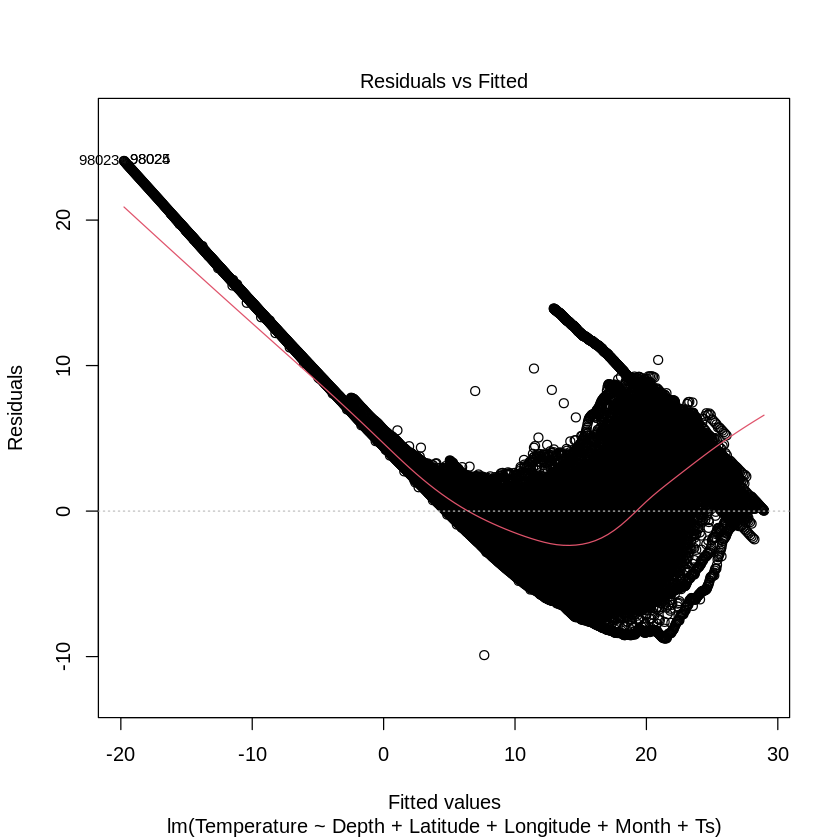

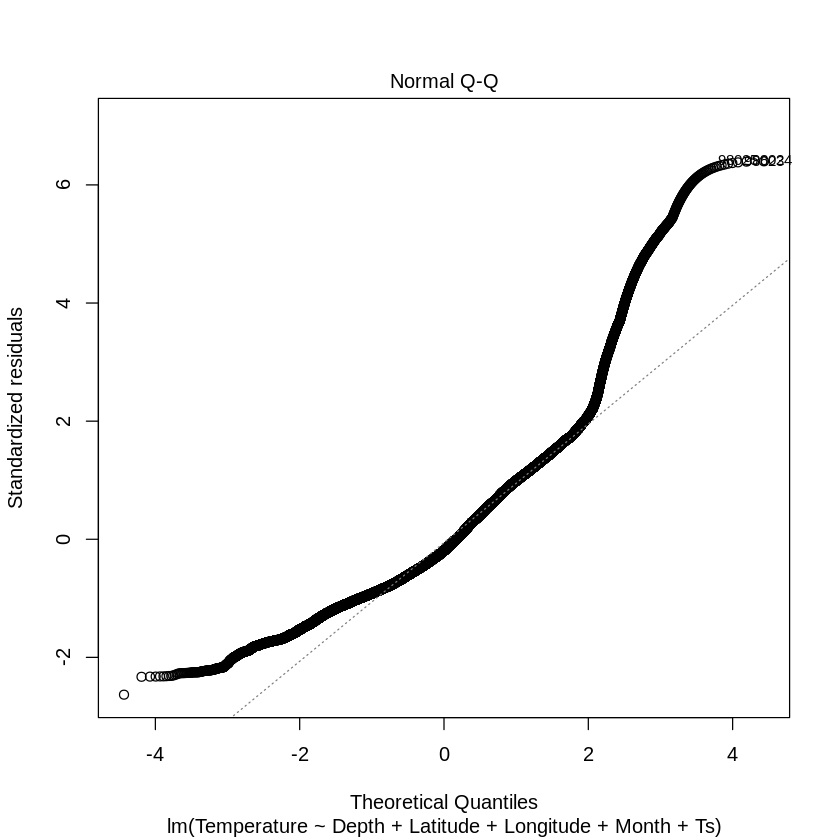

In [ ]:
plot(r0, c(1, 2))

En la gráfica de los residuos contra los valores ajustados vemos que los residuos no se distribuyen de una manera normal y constante, por otra parte el gráfico qqplot igual muestra que los residuos no se ajustan a la linea, por lo tanto no es posible validar el modelo generativo. Sin embargo como todos los predictores parecen ser significativos, parece ser necesario aplicar transformacion y/o interecciones a los predictores.

Se empezará realiazando una tranformación al predictor Depth, ya que mostraba una relación no lineal con la variable de respuesta.

In [ ]:
r1 <- lm(Temperature ~ sqrt(Depth) + Latitude + Longitude + Month + Ts, data = dat)
summary(r1)


Call:
lm(formula = Temperature ~ sqrt(Depth) + Latitude + Longitude + 
    Month + Ts, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6390 -1.7666 -0.3062  1.5754 15.4005 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 274.923889   2.193021  125.36   <2e-16 ***
sqrt(Depth)  -0.897859   0.001092 -822.24   <2e-16 ***
Latitude     -0.768096   0.005834 -131.66   <2e-16 ***
Longitude     2.639299   0.025130  105.02   <2e-16 ***
Month        -0.050570   0.002445  -20.68   <2e-16 ***
Ts            0.060477   0.002022   29.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.617 on 108458 degrees of freedom
Multiple R-squared:  0.8743,	Adjusted R-squared:  0.8743 
F-statistic: 1.509e+05 on 5 and 108458 DF,  p-value: < 2.2e-16


Como se puede observar la $R^2 \text{ ajustada}$ aumento, de 0.7404 paso a 0.8743.

Revisemos si ahora si se puede validar el modelo generativo.

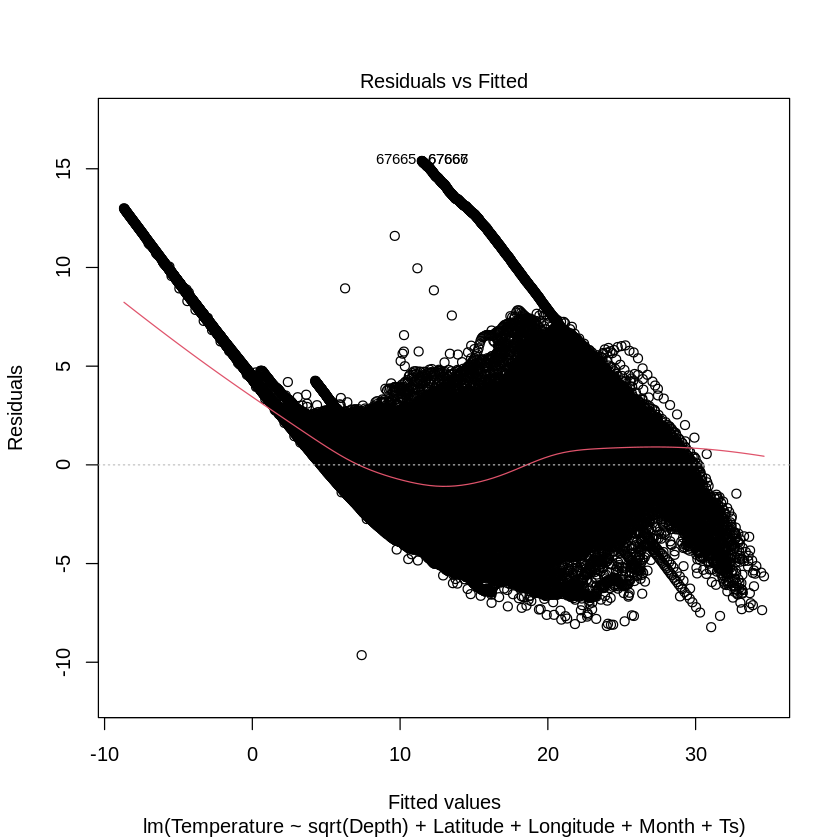

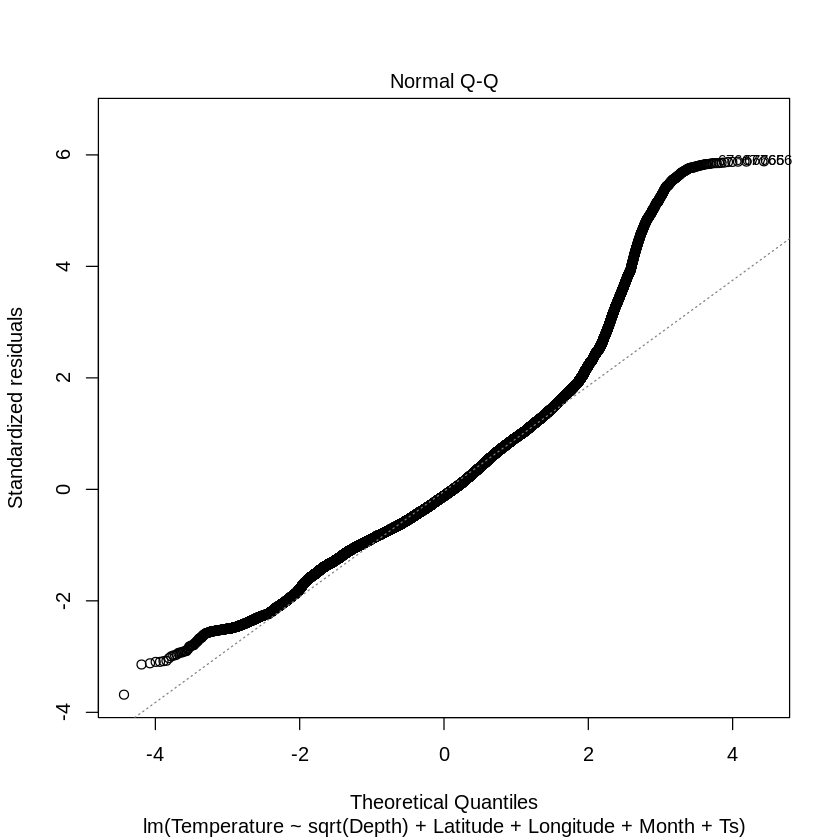

In [ ]:
plot(r1, c(1, 2))

El ajuste de los residuos no parece tener mejoras, por lo que ahora se probara transformando Depth usando un polinomio de segundo grado.

In [ ]:
r2 <- lm(Temperature ~ poly(Depth, 2, raw = T) + Latitude + Longitude + Month + Ts, data = dat)
summary(r2)


Call:
lm(formula = Temperature ~ poly(Depth, 2, raw = T) + Latitude + 
    Longitude + Month + Ts, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-8.884 -1.563  0.062  1.631 16.036 

Coefficients:
                           Estimate Std. Error  t value Pr(>|t|)    
(Intercept)               2.498e+02  2.053e+00  121.683   <2e-16 ***
poly(Depth, 2, raw = T)1 -4.162e-02  5.858e-05 -710.462   <2e-16 ***
poly(Depth, 2, raw = T)2  1.652e-05  4.319e-08  382.525   <2e-16 ***
Latitude                 -6.022e-01  5.605e-03 -107.447   <2e-16 ***
Longitude                 2.431e+00  2.354e-02  103.238   <2e-16 ***
Month                    -2.012e-02  2.302e-03   -8.742   <2e-16 ***
Ts                        1.661e-02  1.949e-03    8.525   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.454 on 108457 degrees of freedom
Multiple R-squared:  0.8895,	Adjusted R-squared:  0.8895 
F-statistic: 1.455e+05 on 6 and 108457 DF,  p-value

La $R^2 \text{ ajustada}$ volió a aumentar, ahora tiene un valor de 0.8895.

Revisemos si ahora si se puede validar el modelo generativo.

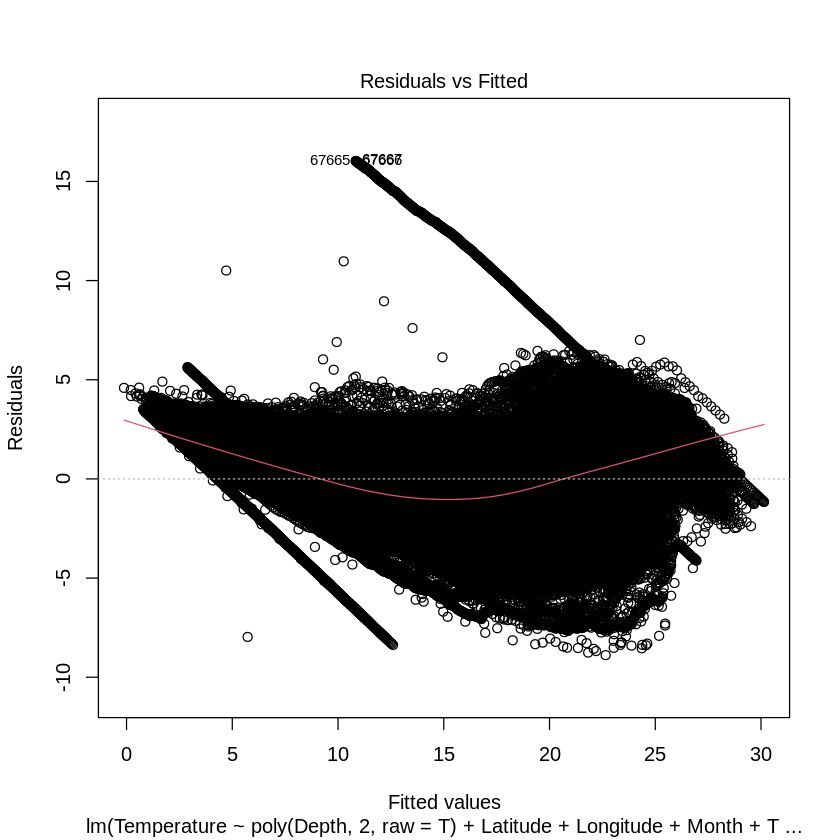

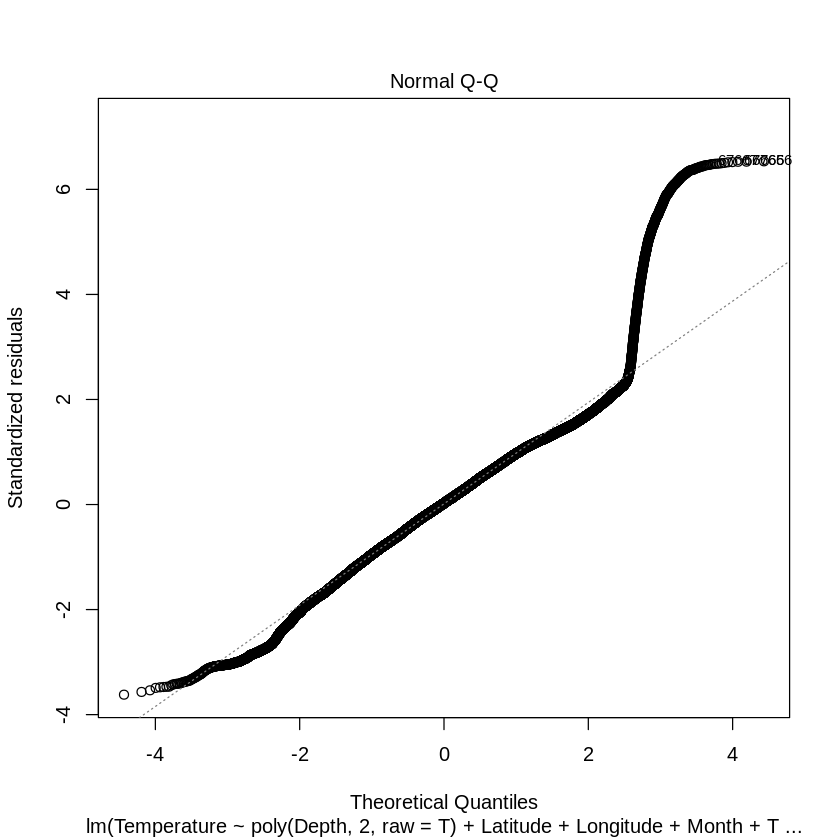

In [ ]:
plot(r2, c(1, 2))

Como se puede observar los residuos se ajustan un poco mejor.

A continuación se estaran probando tranformaciones para Depth aumentando el grado del polinomio.

Una transformación para Depth con un polinomio de grado 5 parece ser lo máximo con lo que se puede transformar, ya que partir de ahi no mejora significativamente la $R^2 \text{ ajustada}$ y y tampoco se muestran mejoras en las gráficas de los residuos. A continución se presenta el resumen del modelo con transformación para Depth con un polinomio de grado 5:

In [ ]:
r3 <- lm(Temperature ~ poly(Depth, 5, raw = T) + Latitude + Longitude + Month + Ts, data = dat)
summary(r3)


Call:
lm(formula = Temperature ~ poly(Depth, 5, raw = T) + Latitude + 
    Longitude + Month + Ts, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6187 -1.2295 -0.0418  1.2690 16.6092 

Coefficients:
                           Estimate Std. Error  t value Pr(>|t|)    
(Intercept)               2.602e+02  1.873e+00  138.912  < 2e-16 ***
poly(Depth, 5, raw = T)1 -6.255e-02  3.254e-04 -192.231  < 2e-16 ***
poly(Depth, 5, raw = T)2  6.224e-05  1.341e-06   46.427  < 2e-16 ***
poly(Depth, 5, raw = T)3 -2.738e-08  2.155e-09  -12.707  < 2e-16 ***
poly(Depth, 5, raw = T)4  2.705e-12  1.425e-12    1.898   0.0577 .  
poly(Depth, 5, raw = T)5  8.311e-16  3.265e-16    2.546   0.0109 *  
Latitude                 -5.638e-01  5.118e-03 -110.161  < 2e-16 ***
Longitude                 2.531e+00  2.146e-02  117.934  < 2e-16 ***
Month                    -1.271e-02  2.099e-03   -6.053 1.43e-09 ***
Ts                       -1.726e-02  1.795e-03   -9.615  < 2e-16 ***
---
Signif. codes:  

Ahora revisemos si con esto ya se puede validar el modelo generativo.

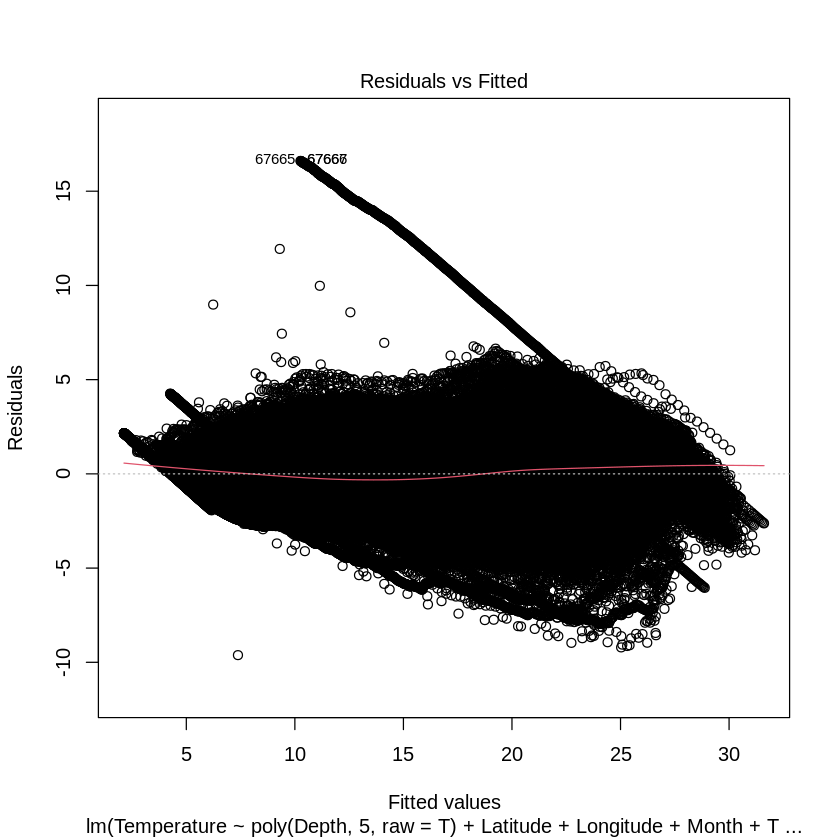

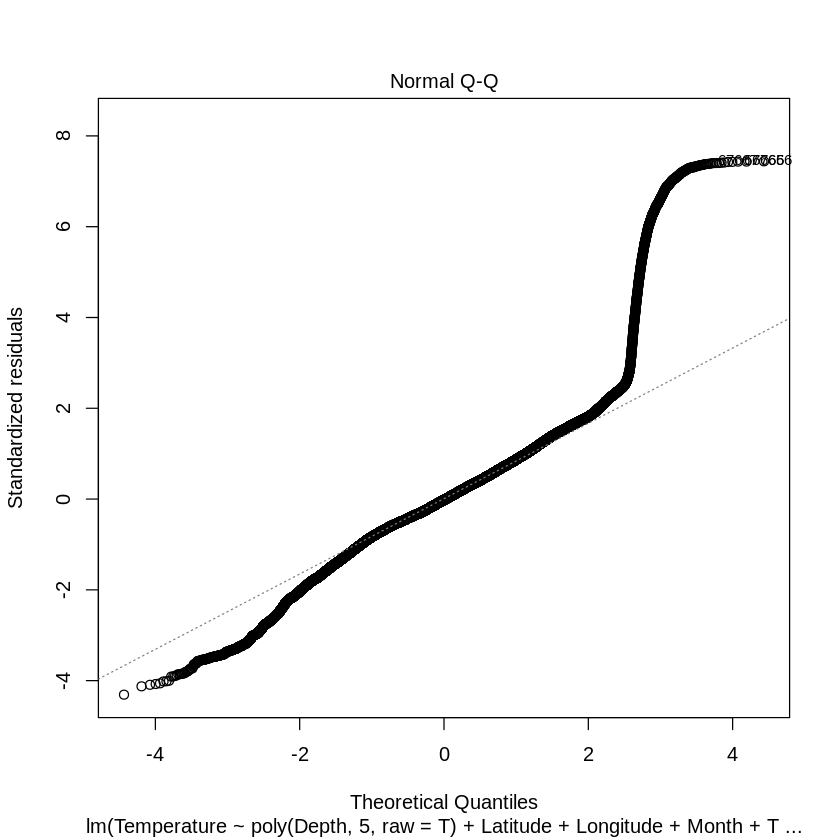

In [ ]:
plot(r3, c(1, 2))

Si bien la linea roja para la grafica de los residuos contra los valores ajustados, ya se encuentra bastante alineada a la recta horizontal en cero, el qqplot aun muestra que es necesario realizar alguna transformación o interacción con los predictores.

Como el resto de predictores en el analisis exploratio no mostraban una relación que indicara la necesidad de realizar transformaciones ahora se probara realizando  interacciones. Dado que la latitud y longitud representan la ubicacion de un punto, quiza sea buena idea que tengan una interaccion, revisemos.

In [ ]:
r4 <- lm(Temperature ~ poly(Depth, 5, raw = T) + Latitude + Longitude + Month + Ts
                        + Latitude:Longitude, data = dat)
summary(r4)


Call:
lm(formula = Temperature ~ poly(Depth, 5, raw = T) + Latitude + 
    Longitude + Month + Ts + Latitude:Longitude, data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3176 -1.1075 -0.0266  1.2164 16.5742 

Coefficients:
                           Estimate Std. Error  t value Pr(>|t|)    
(Intercept)              -1.364e+03  2.313e+01  -58.976  < 2e-16 ***
poly(Depth, 5, raw = T)1 -6.161e-02  3.185e-04 -193.480  < 2e-16 ***
poly(Depth, 5, raw = T)2  5.893e-05  1.312e-06   44.924  < 2e-16 ***
poly(Depth, 5, raw = T)3 -2.340e-08  2.108e-09  -11.101  < 2e-16 ***
poly(Depth, 5, raw = T)4  1.258e-12  1.394e-12    0.903  0.36664    
poly(Depth, 5, raw = T)5  9.355e-16  3.193e-16    2.930  0.00339 ** 
Latitude                  7.427e+01  1.062e+00   69.912  < 2e-16 ***
Longitude                -1.623e+01  2.672e-01  -60.752  < 2e-16 ***
Month                     1.005e-02  2.078e-03    4.838 1.31e-06 ***
Ts                       -1.297e-02  1.757e-03   -7.381 1.59e-13 ***

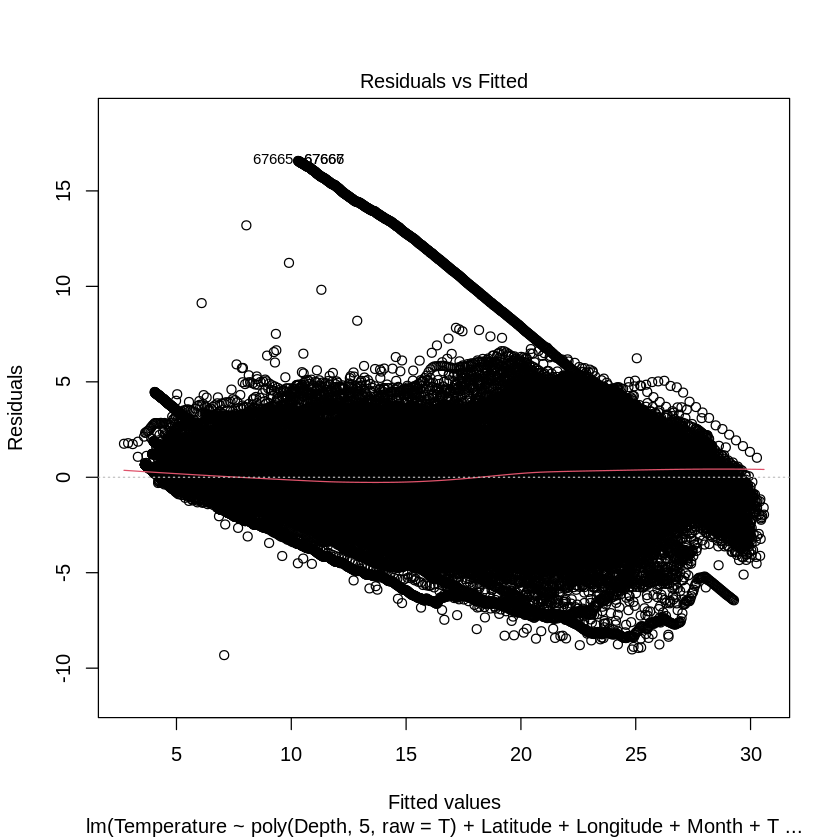

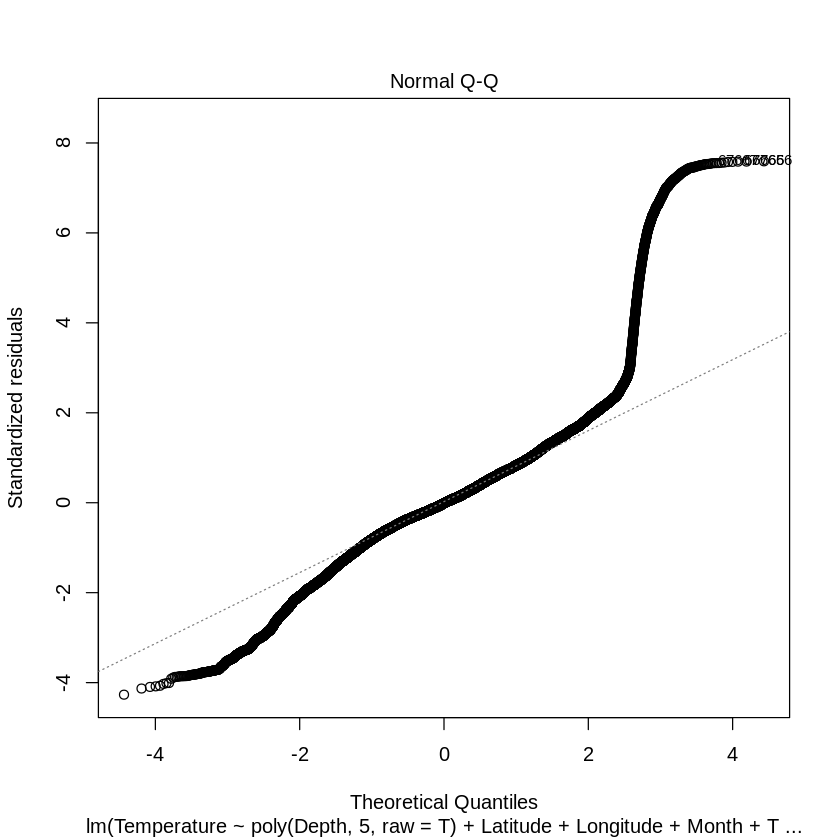

In [ ]:
plot(r4, c(1, 2))

Si bien la $R^2$ ajustada aumento ligeramente, el extremo inferior del qqplot los residuos se alejaron más de la recta, por lo que no parece buena idea realizar una interacción entre la latitud y la longitud.

A continuación se creará otro modelo creando una interacción con la profundidad y la latitud, pero como la profundidad resulto mejor con la transformación del polinomio de grado 5, se realizará la interaccion con esta misma transformacion para la profundidad. Revisemos el resultado.

In [ ]:
r5 <- lm(Temperature ~ poly(Depth, 5, raw = T) + Latitude + Longitude + Month + Ts
                        + poly(Depth, 5, raw = T):Latitude, data = dat)
summary(r5)


Call:
lm(formula = Temperature ~ poly(Depth, 5, raw = T) + Latitude + 
    Longitude + Month + Ts + poly(Depth, 5, raw = T):Latitude, 
    data = dat)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.3112 -1.1485 -0.0751  1.1197 16.5196 

Coefficients:
                                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)                        2.801e+02  1.868e+00 149.935  < 2e-16 ***
poly(Depth, 5, raw = T)1           4.173e-02  4.586e-03   9.100  < 2e-16 ***
poly(Depth, 5, raw = T)2          -5.150e-04  1.848e-05 -27.862  < 2e-16 ***
poly(Depth, 5, raw = T)3           8.231e-07  2.844e-08  28.943  < 2e-16 ***
poly(Depth, 5, raw = T)4          -4.894e-10  1.820e-11 -26.892  < 2e-16 ***
poly(Depth, 5, raw = T)5           9.978e-14  4.077e-15  24.473  < 2e-16 ***
Latitude                          -7.232e-01  1.411e-02 -51.261  < 2e-16 ***
Longitude                          2.725e+00  2.103e-02 129.610  < 2e-16 ***
Month                             -2.843e-03  

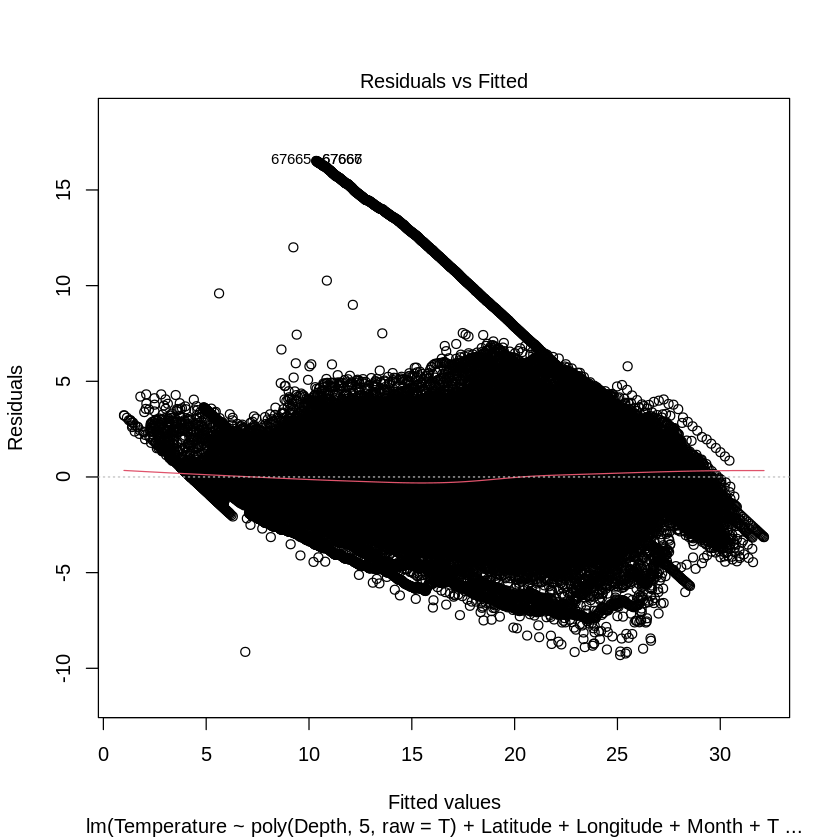

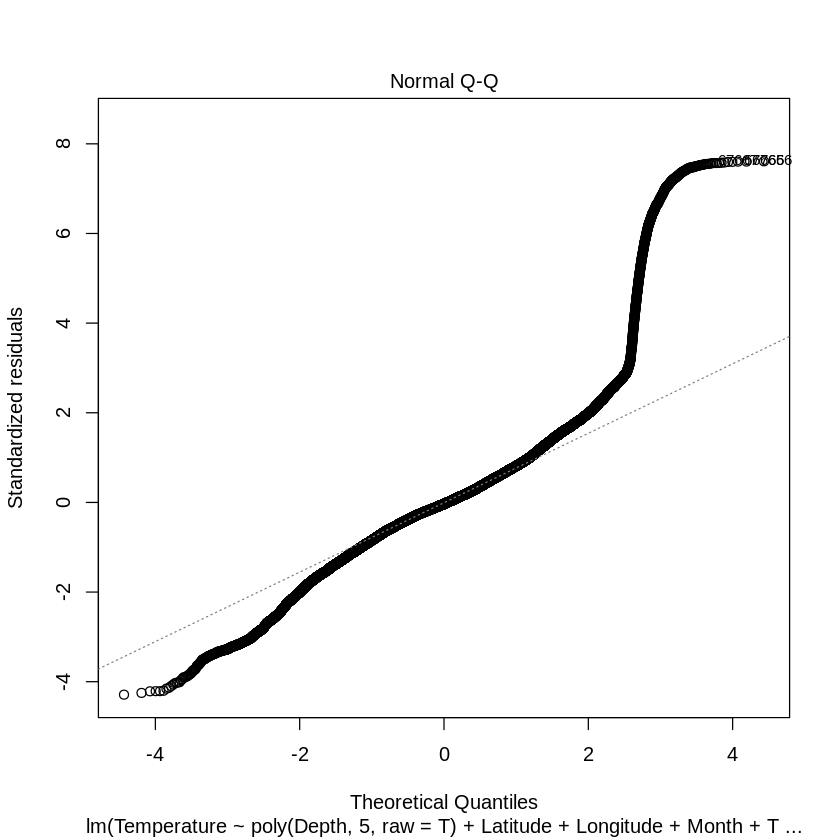

In [ ]:
plot(r5, c(1, 2))

Tras esta ultima interacción la $R^2$ ajustada aumento y el qqplot en el extremo inferior mejoro un poco, por lo que se queda.

Ahora se probara añadiendo una interacción más con la profundidad y la longitud.

In [ ]:
r6 <- lm(Temperature ~ poly(Depth, 5, raw = T) + Latitude + Longitude + Month + Ts
                        + poly(Depth, 5, raw = T):Latitude + poly(Depth, 5, raw = T):Longitude,
                        data = dat)
summary(r6)


Call:
lm(formula = Temperature ~ poly(Depth, 5, raw = T) + Latitude + 
    Longitude + Month + Ts + poly(Depth, 5, raw = T):Latitude + 
    poly(Depth, 5, raw = T):Longitude, data = dat)

Residuals:
   Min     1Q Median     3Q    Max 
-9.285 -1.123 -0.071  1.109 16.522 

Coefficients:
                                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)                         1.783e+02  5.227e+00  34.110  < 2e-16 ***
poly(Depth, 5, raw = T)1            2.035e+00  7.990e-02  25.470  < 2e-16 ***
poly(Depth, 5, raw = T)2           -6.985e-03  3.513e-04 -19.882  < 2e-16 ***
poly(Depth, 5, raw = T)3            7.536e-06  6.053e-07  12.450  < 2e-16 ***
poly(Depth, 5, raw = T)4           -3.240e-09  4.318e-10  -7.505 6.21e-14 ***
poly(Depth, 5, raw = T)5            4.695e-13  1.064e-13   4.414 1.02e-05 ***
Latitude                           -6.974e-01  1.421e-02 -49.095  < 2e-16 ***
Longitude                           1.553e+00  5.971e-02  26.014  < 2e-16 ***
Month      

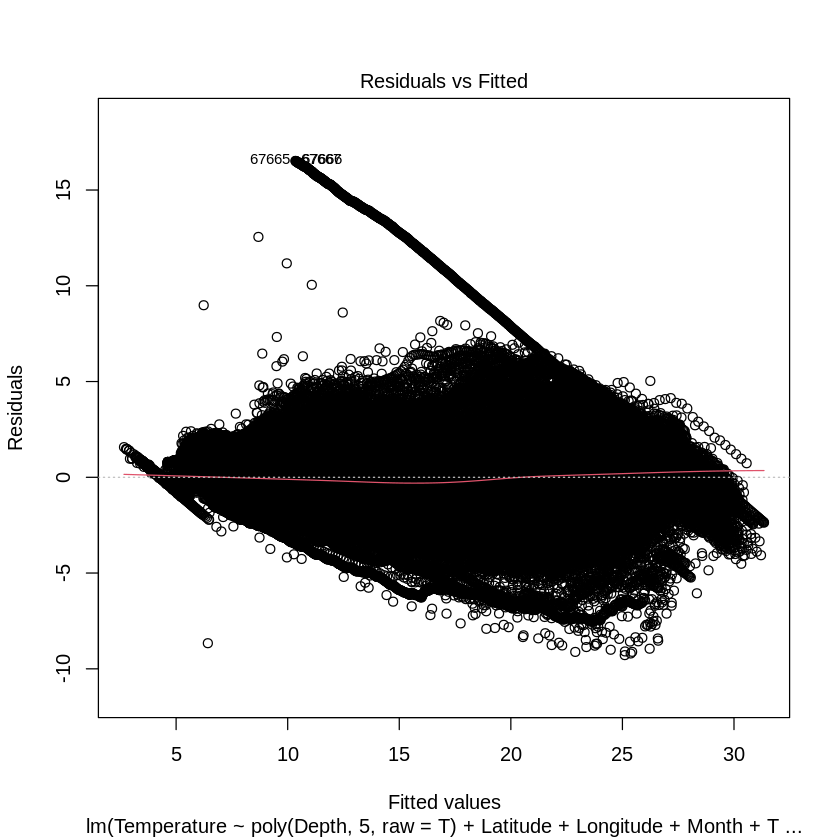

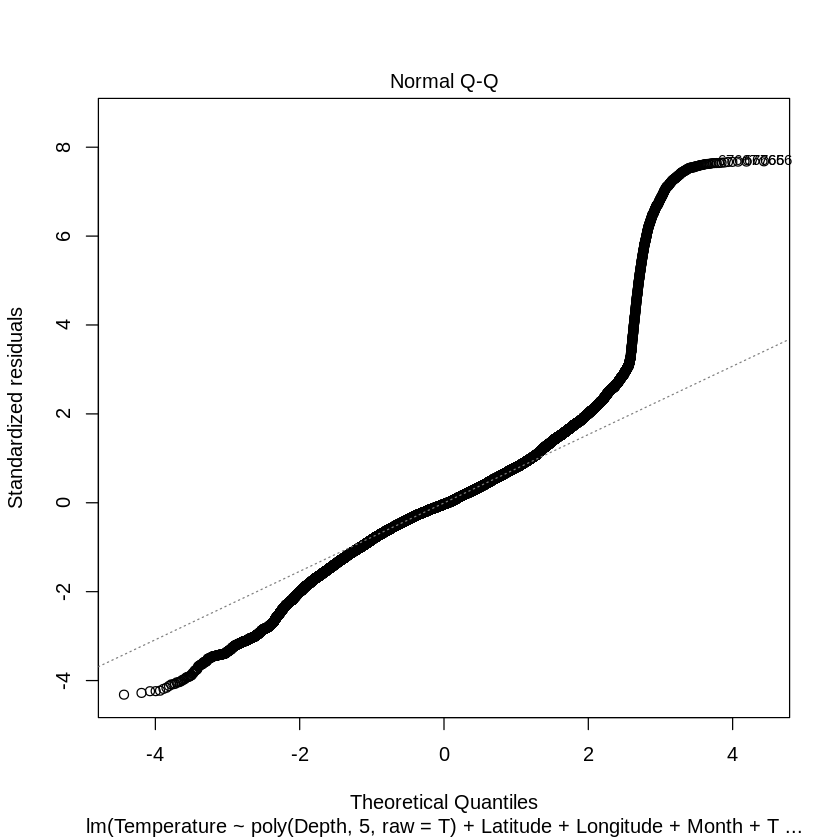

In [ ]:
plot(r6, c(1, 2))

Nuevamente con esta otra interacción la $R^2$ ajustada aumento un poco y el qqplot en el extremo inferior también mejoro ligeramente.

Tras probar con más interacciones el valor de $R^2$ ajustada no aumentaba significamente y el qqplot en algunos casos empeoraba o se mantenia igual, por lo que el mejor modelo de regresion lineal multiple encontrado y que se puede validar el uso del modelo generativo fue el ultimo que se analizo, y a pesar de que el qqplot no quedo tan alineado fue el mejor encontrado ademas los residuos contra los valores ajustados si dan apoyo a la validación del modelo al ajustarse la linea roja bastante bien a la recta horizontal en cero.



## Validación.

Con la $R^2$ ajustada del modelo final de 0.9151 y con las gráficas anteriores que mostraban los residuos contra los valores ajustados y el qqplot es posible validar el modelo generativo.

A continuación se revisará la calidad predictiva mediante validación cruzada

In [ ]:
n <- nrow(dat)
inds <- 1:n
inds #guarda los índices de todas las observaciones

[1]     1     2     3     4     5     6     7     8     9    10    11    12
   [13]    13    14    15    16    17    18    19    20    21    22    23    24
   [25]    25    26    27    28    29    30    31    32    33    34    35    36
   [37]    37    38    39    40    41    42    43    44    45    46    47    48
   [49]    49    50    51    52    53    54    55    56    57    58    59    60
   [61]    61    62    63    64    65    66    67    68    69    70    71    72
   [73]    73    74    75    76    77    78    79    80    81    82    83    84
   [85]    85    86    87    88    89    90    91    92    93    94    95    96
   [97]    97    98    99   100   101   102   103   104   105   106   107   108
  [109]   109   110   111   112   113   114   115   116   117   118   119   120
  [121]   121   122   123   124   125   126   127   128   129   130   131   132
  [133]   133   134   135   136   137   138   139   140   141   142   143   144
  [145]   145   146   147   148   149   150   151   152   153   154   155   156
  [157]   157   158   159   160   161   162   163   164   165   166   167   168
  [169]   169   170   171   172   173   174   175   176   177   178   179   180
  [181]   181   182   183   184   185   186   187   188   189   190   191   192
  [193]   193   194   195   196   197   198   199   200   201   202   203   204
  [205]   205   206   207   208   209   210   211   212   213   214   215   216
  [217]   217   218   219   220   221   222   223   224   225   226   227   228
  [229]   229   230   231   232   233   234   235   236   237   238   239   240
  [241]   241   242   243   244   245   246   247   248   249   250   251   252
  [253]   253   254   255   256   257   258   259   260   261   262   263   264
  [265]   265   266   267   268   269   270   271   272   273   274   275   276
  [277]   277   278   279   280   281   282   283   284   285   286   287   288
  [289]   289   290   291   292   293   294   295   296   297   298   299   300
  [301]   301   302   303   304   305   306   307   308   309   310   311   312
  [313]   313   314   315   316   317   318   319   320   321   322   323   324
  [325]   325   326   327   328   329   330   331   332   333   334   335   336
  [337]   337   338   339   340   341   342   343   344   345   346   347   348
  [349]   349   350   351   352   353   354   355   356   357   358   359   360
  [361]   361   362   363   364   365   366   367   368   369   370   371   372
  [373]   373   374   375   376   377   378   379   380   381   382   383   384
  [385]   385   386   387   388   389   390   391   392   393   394   395   396
  [397]   397   398   399   400   401   402   403   404   405   406   407   408
  [409]   409   410   411   412   413   414   415   416   417   418   419   420
  [421]   421   422   423   424   425   426   427   428   429   430   431   432
  [433]   433   434   435   436   437   438   439   440   441   442   443   444
  [445]   445   446   447   448   449   450   451   452   453   454   455   456
  [457]   457   458   459   460   461   462   463   464   465   466   467   468
  [469]   469   470   471   472   473   474   475   476   477   478   479   480
  [481]   481   482   483   484   485   486   487   488   489   490   491   492
  [493]   493   494   495   496   497   498   499   500   501   502   503   504
  [505]   505   506   507   508   509   510   511   512   513   514   515   516
  [517]   517   518   519   520   521   522   523   524   525   526   527   528
  [529]   529   530   531   532   533   534   535   536   537   538   539   540
  [541]   541   542   543   544   545   546   547   548   549   550   551   552
  [553]   553   554   555   556   557   558   559   560   561   562   563   564
  [565]   565   566   567   568   569   570   571   572   573   574   575   576
  [577]   577   578   579   580   581   582   583   584   585   586   587   588
  [589]   589   590   591   592   593   594   595   596   597   598   599   600
  [6

In [ ]:
train_samp <- sample(inds, 0.8*n) #80% de las observaciones al conjunto de entrenamiento
train_samp

[1]  68483  24449  56591  95533  73991  52810  40483  76012  86672  83158
   [11]  30671  51837   3815  25270  66101   7645  87963 103309 100239  17248
   [21]   2930 102453  87284  42209 101353  68355  21434  67852  68309  76220
   [31]  69181  71526  74884  49540  57289  99655  19984  49514   9659  50187
   [41]  30007  71627  31707  99138  51089  38808  90934  67117  14840  47843
   [51]  54093  52807  42223  61113  63924  40925  82371 105779  91844  83290
   [61]  33210  29407  92260   6135  45465  92719  89530  31305  17279  91926
   [71] 104469  34590  42400  86231   9458  43060  15729  48113  41118  64478
   [81]  95520  67055  41315  84673  39557  58418  11699  91013  53509  78959
   [91]  12050  97338  61345 103512  46830 104748  96277  85879  74079  36892
  [101]  66005  86524  36827  91587  27919  37090  26205  70380   1866  90202
  [111]  50330  75643 102178  68186  44319  36430  96041  91196  47203  56790
  [121]    723  66243 108107 108087  31252  58653  77417  14386  83069  13999
  [131]  24543 101587  39103 104621   8251   7040  84280  92531 107641  53453
  [141]  51051  94956  52979  12522  63819  98346  74659 102601  99108  90854
  [151] 106667  99827  90674  27713  10874   6782  47785  78630  16640  45539
  [161]  15142 106270  29381  81304  83946    870 101107  16325  31532  83187
  [171]  39346  29325  35168  46807  70412  78864  56470  75519   7322  61364
  [181]  95397  88613  18698   9837  99616  59213  63899 107123  46435  65746
  [191] 105647  78032 101950  48210  70522   1438  61890  33594  69861  58303
  [201]  18184  57897  55974  74574   2439  91778  43262  88842  38999  28704
  [211]  14524 104329   5525  28730  79330 106657  96473  79787  23775  72370
  [221]  22915  95950  49530  82375  30650  50321  59208  61329  83801  88908
  [231] 106871   4796  96158  69267  10919  87297   3210  64426   3645  92468
  [241]  85029  73213  41429  38105  24436  41257  70723  26056  99274  77830
  [251]  98008  87889  73687  62127 103562  88785  51949  95049  99238  83661
  [261] 107170  63387  96695  78463  29295  14772  48896  19781  47999  42841
  [271]  19413  28038  10793  39684  32672  83867  97339 101741  37727   6219
  [281]  97908   6470  23140  20057  65790  22887  58350  37002  29353  57364
  [291]  15979  94974  68713  80971  92102  52182  43510  57620  35975  62477
  [301]  35515  67957  87283  81943 100291  52114  47596  65596  24642  88026
  [311]  10216  69568  86944  80113  86676  28670   1707  10042  97624  10013
  [321]  70638  33713  29774  82155   3957  47256  27410 105935  57707   7524
  [331]  47280  81944    831  81766  53897   6508  67788  72974   8509  58313
  [341]  25255 105362  43183  51933  51504  70499  55033 103946  92802  16476
  [351]  60761     54  82709  30674  35567  43995   8529  61508  98532  48409
  [361]  81182  47505  15913 105664  24946  24684  46221  94083  43165  32126
  [371]  62166  30401  85191  88986  38885  24214  19924  14051  35541  84602
  [381]  14217  33746  10544  20232   5159  54566  99474  47236  71180  34608
  [391]  78953  33537  27103 108263  87369  36773  61454   6408  45345  16291
  [401]  95959 104465  83813 103094   7808  72777  29647 108160 101349  18702
  [411]  51156  63257  72613  79365  36438  47642  54074  12533  51521  55308
  [421]  95522  55812  84286  91313  51039  76544  28660  89705  45188 100498
  [431]  71288   2200  44634  48466  48876  76500  89358  29201  40546  30214
  [441]  78836  14980  35974  76582   3264  39476  81491  76285   2875  74408
  [451]  26346 105474  50198  16109  93753  98479  98278  18726  16063  43070
  [461]  54358  18576  39001  15867  71877  54439  62905  62122  88507  15615
  [471]  67030  42210  29597  79227  43223  64154  63777  97357  83680  57093
  [481]  10082   4258  87222  41394  21401    578  25614  55894  51037  27976
  [491]  35921  84877   1666  20514  24870  44235  94768  85350  60616  58394
  [501]  22472  18890  82350   7028  39243   4637  10635  85278   5448  40949
  [511]  24338  24616 1017

In [ ]:
test_samp <- inds[-train_samp] #20% al conjunto de prueba
test_samp

[1]     12     13     17     21     34     37     39     41     55     58
   [11]     60     63     66     67     69     75     79     81     94     98
   [21]     99    112    116    122    126    128    138    141    149    152
   [31]    156    157    162    175    177    185    191    192    195    196
   [41]    203    230    243    255    262    283    287    295    296    303
   [51]    308    320    322    324    327    337    342    343    349    352
   [61]    354    355    357    361    363    385    387    396    397    409
   [71]    412    416    418    420    421    427    444    448    451    460
   [81]    469    470    475    485    486    487    489    490    493    496
   [91]    501    510    513    526    528    533    534    541    544    549
  [101]    550    560    564    567    568    576    577    588    589    595
  [111]    596    599    612    614    616    624    633    637    643    648
  [121]    655    658    664    665    673    686    690    705    708    712
  [131]    713    715    721    728    732    738    753    766    769    781
  [141]    783    787    788    794    795    798    809    817    818    819
  [151]    820    823    833    834    838    841    847    862    865    871
  [161]    876    884    896    897    908    911    912    914    917    918
  [171]    934    935    938    941    942    943    947    949    951    954
  [181]    958    960    961    967    977    980    985    986    990    998
  [191]   1004   1007   1016   1018   1024   1025   1028   1030   1035   1036
  [201]   1043   1047   1048   1052   1055   1057   1060   1069   1070   1071
  [211]   1074   1079   1081   1083   1097   1101   1108   1113   1114   1116
  [221]   1131   1136   1139   1148   1155   1156   1157   1160   1173   1178
  [231]   1187   1192   1193   1198   1207   1208   1210   1212   1214   1216
  [241]   1221   1230   1234   1242   1247   1249   1250   1254   1263   1275
  [251]   1277   1279   1282   1284   1290   1303   1307   1311   1318   1328
  [261]   1337   1340   1341   1342   1345   1346   1347   1355   1358   1359
  [271]   1361   1363   1367   1379   1383   1385   1391   1392   1408   1412
  [281]   1415   1417   1423   1430   1432   1434   1436   1444   1445   1452
  [291]   1455   1479   1488   1497   1500   1508   1511   1515   1524   1528
  [301]   1533   1536   1547   1553   1564   1567   1569   1571   1583   1585
  [311]   1587   1591   1598   1599   1601   1602   1603   1628   1637   1652
  [321]   1664   1665   1673   1675   1680   1686   1691   1703   1705   1709
  [331]   1712   1713   1720   1721   1732   1744   1745   1758   1775   1788
  [341]   1789   1792   1793   1796   1803   1815   1818   1825   1831   1837
  [351]   1839   1840   1861   1865   1874   1875   1878   1880   1881   1886
  [361]   1893   1896   1904   1913   1914   1926   1932   1935   1938   1939
  [371]   1940   1954   1957   1966   1972   1973   1980   1992   1993   1994
  [381]   1996   2001   2003   2011   2012   2019   2020   2021   2032   2034
  [391]   2035   2043   2045   2050   2056   2058   2062   2063   2067   2068
  [401]   2071   2075   2092   2099   2120   2124   2134   2148   2157   2162
  [411]   2163   2164   2166   2171   2172   2173   2176   2190   2191   2193
  [421]   2212   2216   2227   2237   2241   2253   2260   2273   2282   2285
  [431]   2293   2294   2300   2306   2309   2317   2319   2324   2332   2336
  [441]   2339   2342   2344   2345   2357   2363   2364   2381   2384   2401
  [451]   2403   2404   2413   2416   2420   2421   2422   2427   2428   2429
  [461]   2436   2445   2452   2455   2471   2477   2486   2510   2513   2517
  [471]   2519   2522   2526   2529   2530   2538   2541   2551   2553   2556
  [481]   2566   2567   2577   2592   2593   2594   2598   2626   2635   2638
  [491]   2639   2660   2661   2666   2669   2671   2675   2677   2680   2690
  [501]   2699   2707   2709   2722   2724   2726   2728   2731   2732   2736
  [511]   2753   2755   27

In [ ]:
train <- dat[train_samp, ]
test <- dat[test_samp, ]

train$Cast <- NULL
test$Cast <- NULL

Evaluamos el error sobre los datos de prueba

In [ ]:
n_test <- nrow(test)

In [ ]:
#modelo 0
temperature_p0 <- predict(object = r0, test)
mrs0 <- sum((test$Temperature-temperature_p0)^2)/n_test #error cuadrático medio
mrs0

[1] 14.18525

In [ ]:
#modelo 1
temperature_p1 <- predict(object = r1, test)
mrs1 <- sum((test$Temperature-temperature_p1)^2)/n_test #error cuadrático medio
mrs1

[1] 6.873971

In [ ]:
#modelo 2
temperature_p2 <- predict(object = r2, test)
mrs2 <- sum((test$Temperature-temperature_p2)^2)/n_test #error cuadrático medio
mrs2

[1] 6.074823

In [ ]:
#modelo 3
temperature_p3 <- predict(object = r3, test)
mrs3 <- sum((test$Temperature-temperature_p3)^2)/n_test #error cuadrático medio
mrs3

[1] 5.056231

In [ ]:
#modelo 4
temperature_p4 <- predict(object = r4, test)
mrs4 <- sum((test$Temperature-temperature_p4)^2)/n_test #error cuadrático medio
mrs4

[1] 4.834722

In [ ]:
#modelo 5
temperature_p5 <- predict(object = r5, test)
mrs5 <- sum((test$Temperature-temperature_p5)^2)/n_test #error cuadrático medio
mrs5

[1] 4.782051

In [ ]:
#modelo 6
temperature_p6 <- predict(object = r6, test)
mrs6 <- sum((test$Temperature-temperature_p6)^2)/n_test #error cuadrático medio
mrs6

[1] 4.694951

Como se puede observar de los anteriores resultado con el modelo final, el modelo 6 se consiguio el menor error cuadratico medio con un valor de 4.695, con la cual se puede concluir que la calidad predictiva es relativamente buena.

## Conclusiones.

El modelo de regresión lineal múltiple se ajustó bastante bien para predecir la temperatura del mar (del caribe mexicano) a cierta profundidad y ubicación con una buena exactitud, el valor de la  $R$  ajustada como se vio fue alto (0.9151) a pesar de que se trabajaron con 5 predictores, siendo las transformaciones e interacciones implementados de ayuda para aumentar su valor.  Por otra parte como se vio en el gráfico de los valores ajustados contra los residuos fue posible validar el uso del modelo generativo. De igual manera tras aplicar la validación cruzada se obtuvo un valor muy pequeño para el error cuadrático medio de 4.695 lo cual apoya también el uso del modelo de regresión lineal múltiple para realizar predicciones. 